<div style='background-color: #6E5785;padding:10px; color: #FEFEFF; border : 0px solid #EBCD37; margin:10px; font-size: 50px;text-align: center; font-weight: bold; text-indent:0px'>
     <div style="border: 3px solid #EBCD37; padding: 5px; margin: 5px;">
       <img src="https://myrealestate.in/storage/2021/10/home-insurance-myrealestate.jpg" alt="Italian Trulli" width="200" height="200" align='right' style="margin-right: 200px;" />
 <p><Left>  Insurance Prediction:<br> Linear_Regression</left></p>
</div></div>

   >

### Import Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv('https://github.com/sukhioo7/dataset/blob/main/insurance.csv?raw=true')
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
df.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## <b>Charges Distribution</b>

<Axes: xlabel='charges', ylabel='Count'>

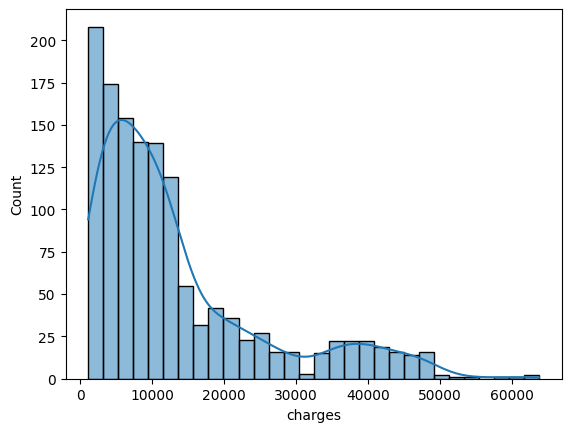

In [18]:
sns.histplot(data=df, x=df['charges'],kde=True)

it's not a normal distribution, it is left skewed distribution. It shows that the data we've been given has more records of people having charges less than 15000. So the machine will be biased towards the prediction. As it will give more accurate result for less charges(below 15k) only . and not for the charges above 15k.

## <b>Visualisation</b>

Text(0, 0.5, 'charges')

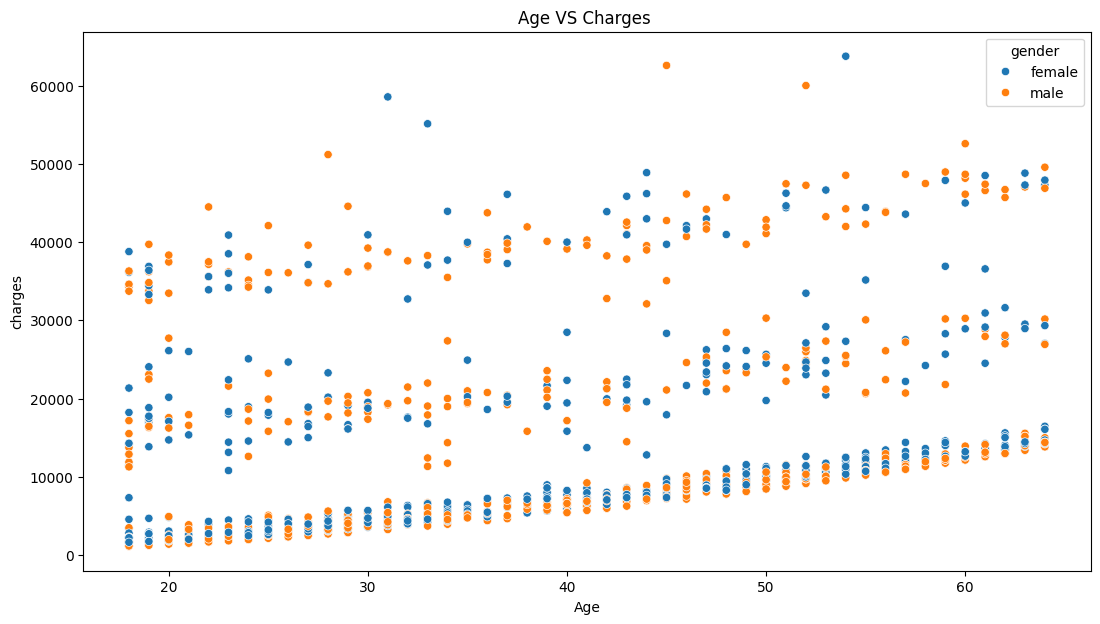

In [19]:
plt.figure(figsize=(13,7))
plt.title('Age VS Charges ')
sns.scatterplot(x=df['age'],y=df['charges'],hue=df['gender'])
plt.xlabel('Age')
plt.ylabel('charges')


Text(0, 0.5, 'charges')

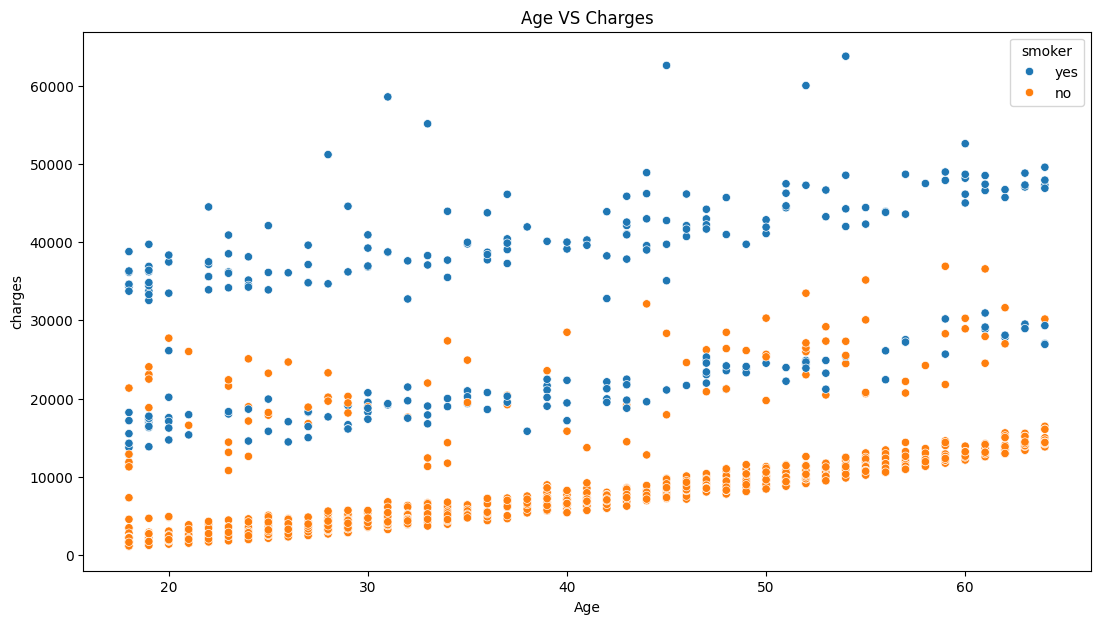

In [20]:
plt.figure(figsize=(13,7))
plt.title('Age VS Charges')
sns.scatterplot(x=df['age'],y=df['charges'],hue=df['smoker'])
plt.xlabel('Age')
plt.ylabel('charges')

Text(0, 0.5, 'charges')

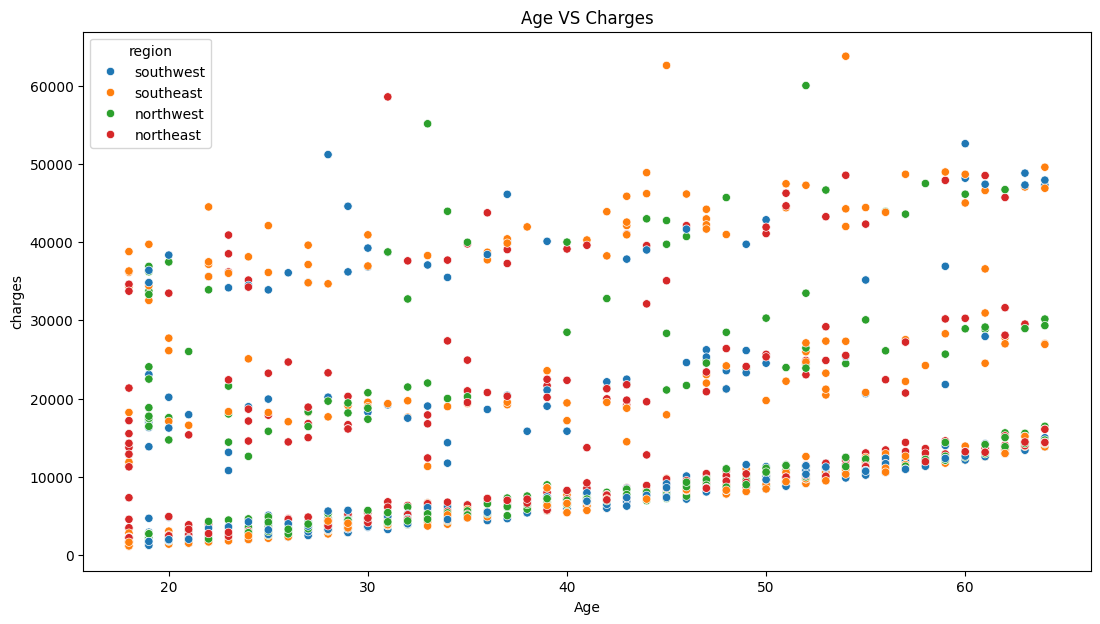

In [21]:
plt.figure(figsize=(13,7))
plt.title('Age VS Charges')
sns.scatterplot(x=df['age'],y=df['charges'],hue=df['region'])
plt.xlabel('Age')
plt.ylabel('charges')

Text(0, 0.5, 'charges')

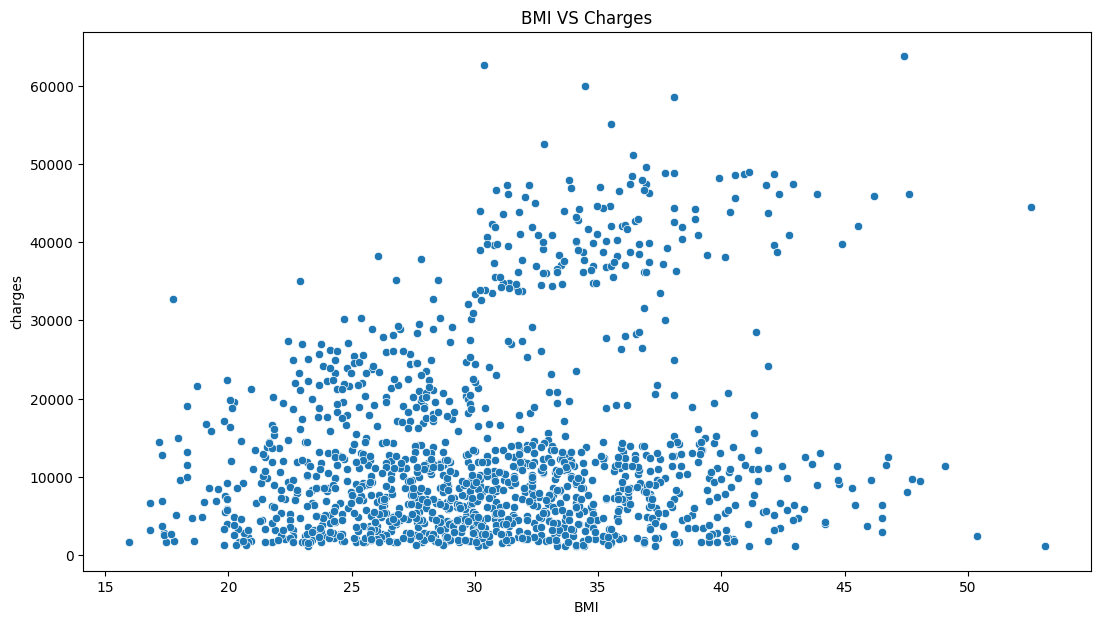

In [22]:
plt.figure(figsize=(13,7))
plt.title('BMI VS Charges')
sns.scatterplot(x=df['bmi'],y=df['charges'])
plt.xlabel('BMI')
plt.ylabel('charges')

Text(0, 0.5, 'charges')

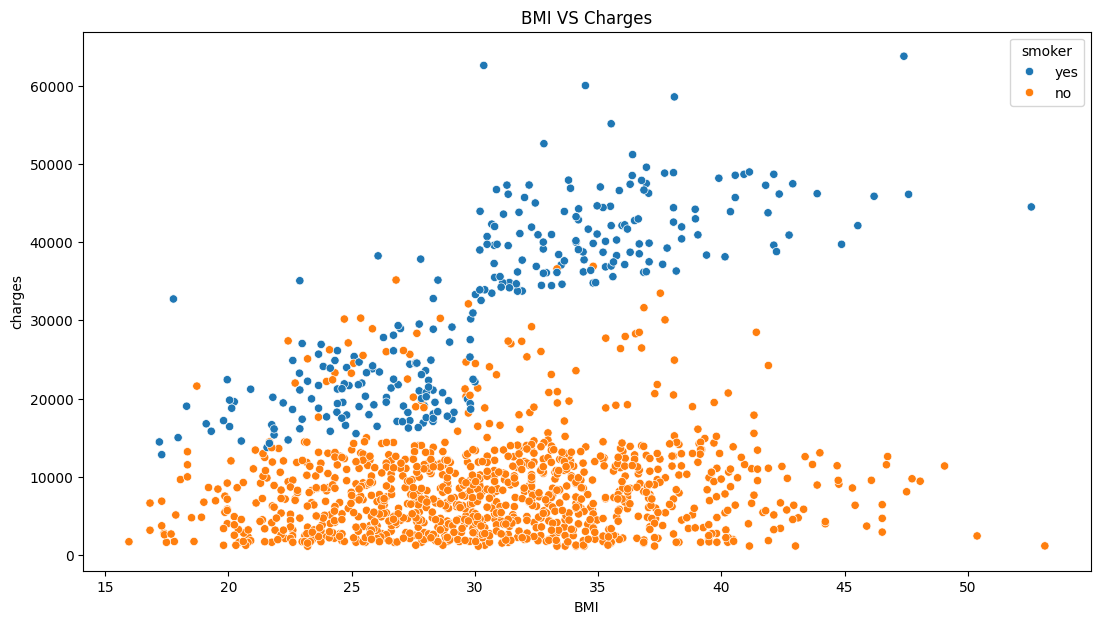

In [23]:
plt.figure(figsize=(13,7))
plt.title('BMI VS Charges')
sns.scatterplot(x=df['bmi'],y=df['charges'],hue=df['smoker'])
plt.xlabel('BMI')
plt.ylabel('charges')

Text(0, 0.5, 'count')

<Figure size 1300x700 with 0 Axes>

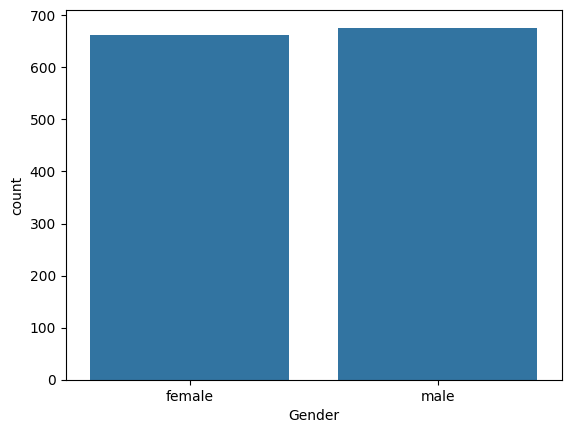

In [24]:
plt.figure(figsize=(13,7))
plt.figure('Gender Distribution')
sns.countplot(x=df['gender'])
plt.xlabel('Gender')
plt.ylabel('count')

Text(0, 0.5, 'count')

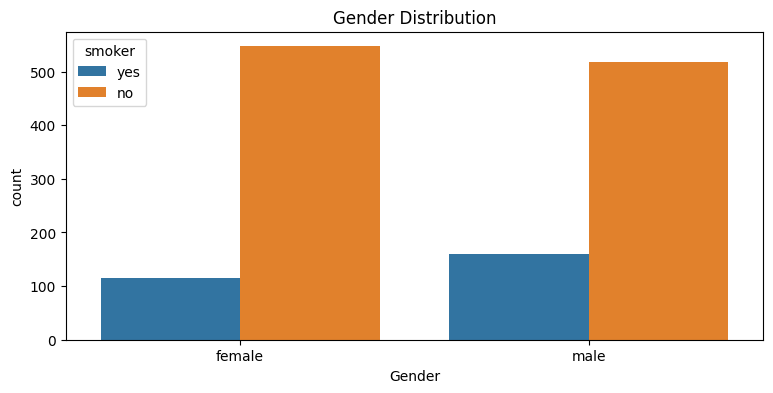

In [25]:
plt.figure(figsize=(9,4))
plt.title('Gender Distribution')
sns.countplot(x=df['gender'],hue=df['smoker'])
plt.xlabel('Gender')
plt.ylabel('count')

Text(0, 0.5, 'count')

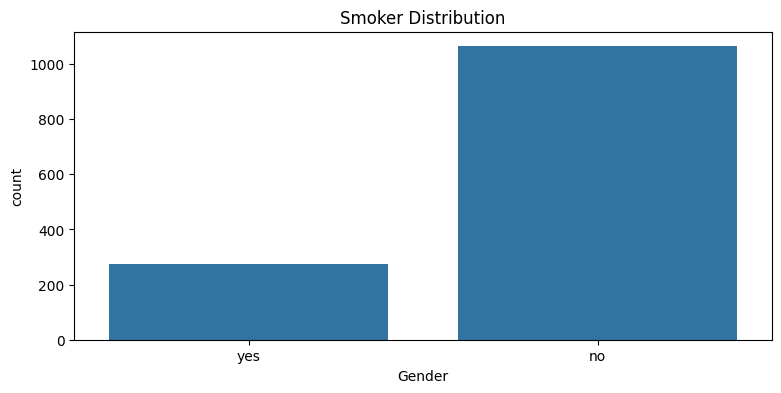

In [26]:
plt.figure(figsize=(9,4))
plt.title('Smoker Distribution')
sns.countplot(x=df['smoker'])
plt.xlabel('Gender')
plt.ylabel('count')

## <b>Label Encoder</b>


In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [28]:
label_encoder.fit(df['smoker'])

LabelEncoder()

In [29]:
df['smoker']=label_encoder.transform(df['smoker'])

In [30]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [31]:
label_encoder.fit(df['gender'])

LabelEncoder()

In [32]:
df['gender']=label_encoder.transform(df['gender'])


In [33]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


## <b>One Hot encoding  
</b>

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
Onehot_encoder=OneHotEncoder()

In [36]:
Onehot_encoder.fit(df[['region']])
# provide the region column as a list as it is supposed to have a 2-D array

OneHotEncoder()

In [37]:
Onehot_encoder.transform(df[['region']])

<1338x4 sparse matrix of type '<class 'numpy.float64'>'
	with 1338 stored elements in Compressed Sparse Row format>

In [38]:
# convert the sparse matrix to array
temp=Onehot_encoder.transform(df[['region']]).toarray()

In [39]:
Onehot_encoder.categories_
# gives the name of the all the values that has been transformed using one hot encoder

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [40]:
# create a temp dataframe to join it to the original dataframe
temp_data=pd.DataFrame(temp,columns=['northeast', 'northwest', 'southeast', 'southwest'],dtype='int')
temp_data.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


## <b> Concatenate the two dataframes </b>

In [41]:
df=pd.concat([df,temp_data],axis=1)


In [42]:
df.head()

,age,gender,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,0,1,0,0


In [43]:
df.drop('region',axis=1,inplace=True)

In [44]:
df.head()

,age,gender,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [45]:
X=df.drop('charges',axis=1)
Y=df['charges']

## <b> Split the Data </b>

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=101)

## <b> Linear Regression </b>

In [47]:
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()


In [48]:
linear_regression.fit(X_train,Y_train)

LinearRegression()

In [49]:
predictions=linear_regression.predict(X_test)

Text(0, 0.5, 'predicted charges')

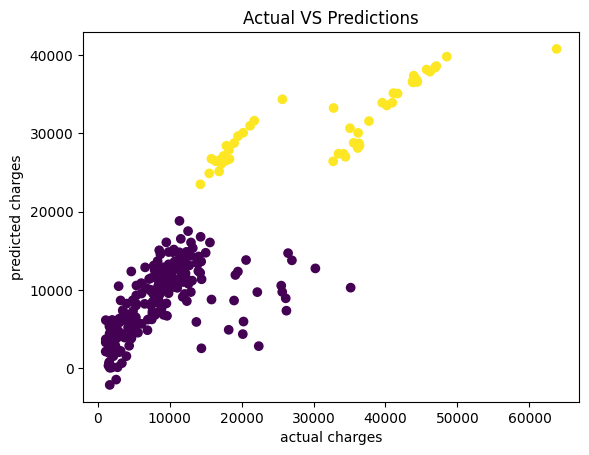

In [54]:
plt.title('Actual VS Predictions')
plt.scatter(x=Y_test,y=predictions,c=X_test['smoker'])
plt.xlabel('actual charges')
plt.ylabel('predicted charges')


## <b> Calculate the Error </b>

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
MAE=mean_absolute_error(Y_test,predictions)
MSE=mean_squared_error(Y_test,predictions)
RMSE=np.sqrt(MSE)
r2=r2_score(Y_test,predictions)
print('mean absolute error:',MAE)
print('root mean square error:',RMSE)
print('mean squared error:',MSE)
print('r2 error:',r2)


mean absolute error: 4036.874028358428
root mean square error: 5809.336741022668
mean squared error: 33748393.37059587
r2 error: 0.7608371101323961
